In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as pdt
import re
import pickle

# Daten laden

In [2]:
dfs = pd.read_pickle('data/dfs.pkl')

# Anteile der Rezepte
### 1. Anteil vegane/vegetarische/fleischhaltige Gerichte

In [3]:
dfs_wod = dfs.drop_duplicates(subset=["url"])
parts = dfs_wod[["vegetarian", "vegan"]].sum()
fges = dfs_wod["vegetarian"].count()
fvegn = dfs_wod["vegan"].sum()
fvegt = dfs_wod["vegetarian"].sum() - fvegn
frest = fges - fvegt - fvegn

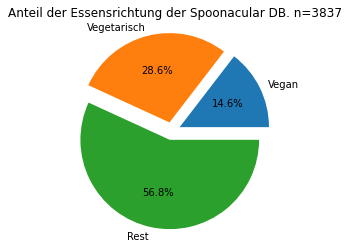

In [4]:
plt.pie([fvegn, fvegt, frest], 
        labels=["Vegan", "Vegetarisch", "Rest"],
       autopct='%1.1f%%', explode=(0.1,0.1,0.1))
plt.axis('equal')
plt.title("Anteil der Essensrichtung der Spoonacular DB. n=" + str(dfs_wod["dairy_free"].count()))
plt.show()

### 2. Anteil laktosefreie Gerichte

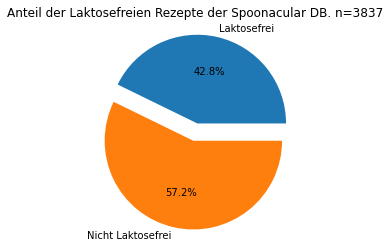

In [5]:
plt.pie([dfs_wod["dairy_free"].sum(), 
         dfs_wod["dairy_free"].count() - dfs_wod["dairy_free"].sum()], 
        labels=["Laktosefrei", "Nicht Laktosefrei"],
       autopct='%1.1f%%', explode=(0.1,0.1))
plt.axis('equal')
plt.title("Anteil der Laktosefreien Rezepte der Spoonacular DB. n=" + str(dfs_wod["dairy_free"].count()))
plt.show()

### 3. Anteil glutenfreier Gerichte

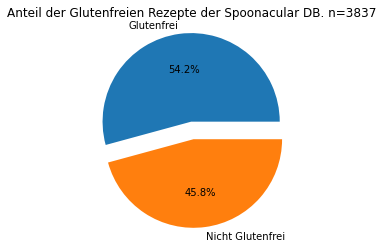

In [6]:
plt.pie([dfs_wod["gluten_free"].sum(), 
         dfs_wod["gluten_free"].count() - dfs_wod["gluten_free"].sum()], 
        labels=["Glutenfrei", "Nicht Glutenfrei"],
       autopct='%1.1f%%', explode=(0.1,0.1))
plt.axis('equal')
plt.title("Anteil der Glutenfreien Rezepte der Spoonacular DB. n=" + str(dfs_wod["gluten_free"].count()))
plt.show()

# Analyse der Inhaltsstoffe
### 1. Bewertung im Verhältnis zu Inhaltsstoffen

#### a) Zucker

In [7]:
dfs_wod.insert(loc=0, column="likes/sugar", value=(dfs_wod["likes"]/dfs_wod["sugar"]))

#### b) Fett

In [8]:
dfs_wod.insert(loc=0, column="likes/fat", value=(dfs_wod["likes"]/dfs_wod["fat"]))

#### c) Kalorien

In [9]:
dfs_wod.insert(loc=0, column="likes/calories", value=(dfs_wod["likes"]/dfs_wod["calories"]))

In [10]:
dfs_filtered = dfs_wod[(dfs_wod["likes/sugar"] < dfs_wod["likes/sugar"].quantile(0.9))]

In [11]:
dfs_filtered.describe()

,likes/calories,likes/fat,likes/sugar,id,vegetarian,vegan,gluten_free,dairy_free,likes,ready_in_minutes,calories,sugar,fat
count,3453.000000,3453.000000,3453.000000,3453.000000,3453.000000,3453.000000,3453.000000,3453.000000,3453.000000,3453.000000,3453.000000,3453.000000,3453.000000
mean,0.011436,inf,0.272885,3985.322908,0.419635,0.129453,0.536345,0.410368,3.533160,48.576021,377.479583,19.345207,12.571098
std,0.020750,NaN,0.422114,2385.589446,0.493571,0.335749,0.498750,0.491972,8.713767,38.628828,227.281451,15.575504,13.472600
min,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,10.000000,1.000000,0.000000
25%,0.002347,0.076923,0.047619,2307.000000,0.000000,0.000000,0.000000,0.000000,1.000000,45.000000,202.000000,8.000000,4.000000
50%,0.004386,0.181818,0.100000,4166.000000,0.000000,0.000000,1.000000,0.000000,1.000000,45.000000,340.000000,15.000000,8.000000
75%,0.010204,0.500000,0.285714,5992.000000,1.000000,0.000000,1.000000,1.000000,2.000000,45.000000,513.000000,27.000000,16.000000
max,0.198391,inf,2.642857,7789.000000,1.000000,1.000000,1.000000,1.000000,146.000000,660.000000,1682.000000,115.000000,87.000000


Text(0.5, 1.0, 'Likes')

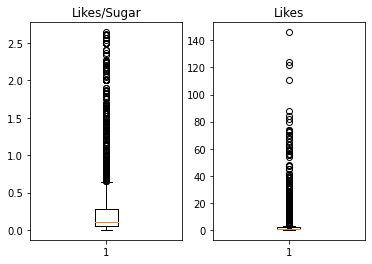

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot(dfs_filtered["likes/sugar"])
ax1.set_title("Likes/Sugar")
ax2.boxplot(dfs_filtered["likes"])
ax2.set_title("Likes")

### 2. Zucker

/home/jakob/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


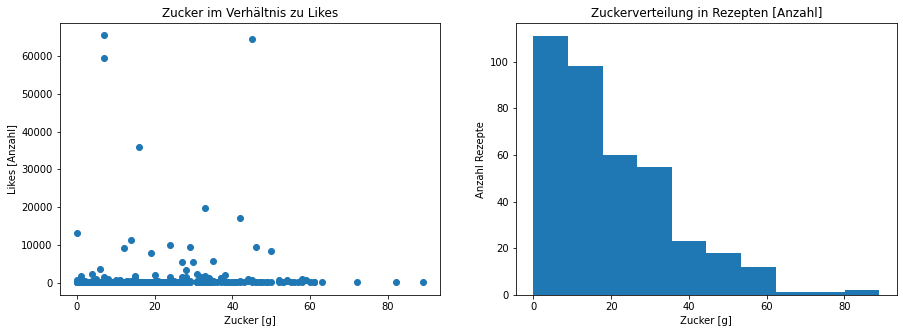

In [13]:
dfs_filtered = dfs_wod[(dfs_wod["likes"] > dfs_wod["likes"].quantile(0.9))]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

ax1.scatter(dfs_filtered["sugar"], dfs_filtered["likes"])
ax1.set_xlabel("Zucker [g]")
ax1.set_ylabel("Likes [Anzahl]")
ax1.set_title("Zucker im Verhältnis zu Likes")

ax2.hist(dfs_filtered["sugar"])
ax2.set_title("Zuckerverteilung in Rezepten [Anzahl]")
ax2.set_xlabel("Zucker [g]")
ax2.set_ylabel("Anzahl Rezepte")

fig.show()

### 3. Fett

/home/jakob/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


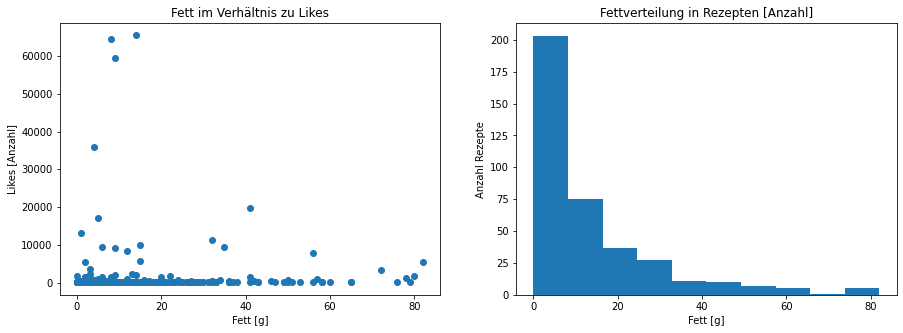

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

ax1.scatter(dfs_filtered["fat"], dfs_filtered["likes"])
ax1.set_xlabel("Fett [g]")
ax1.set_ylabel("Likes [Anzahl]")
ax1.set_title("Fett im Verhältnis zu Likes")

ax2.hist(dfs_filtered["fat"])
ax2.set_title("Fettverteilung in Rezepten [Anzahl]")
ax2.set_xlabel("Fett [g]")
ax2.set_ylabel("Anzahl Rezepte")

fig.show()

### 4. Kalorien

/home/jakob/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


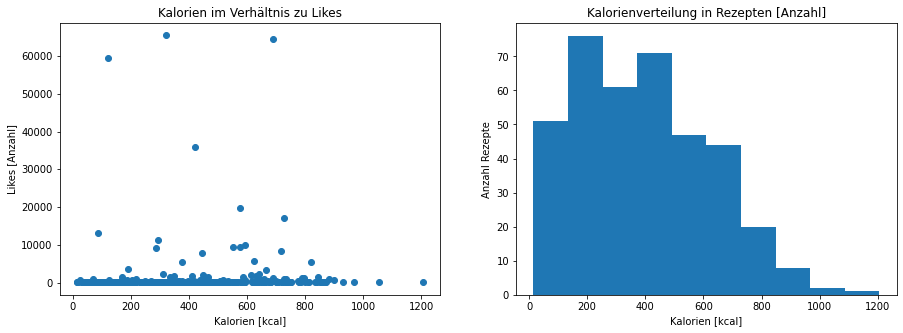

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

ax1.scatter(dfs_filtered["calories"], dfs_filtered["likes"])
ax1.set_xlabel("Kalorien [kcal]")
ax1.set_ylabel("Likes [Anzahl]")
ax1.set_title("Kalorien im Verhältnis zu Likes")

ax2.hist(dfs_filtered["calories"])
ax2.set_title("Kalorienverteilung in Rezepten [Anzahl]")
ax2.set_xlabel("Kalorien [kcal]")
ax2.set_ylabel("Anzahl Rezepte")

fig.show()

### 5. Zusammenhänge statistisch erkennen (Korrelation)

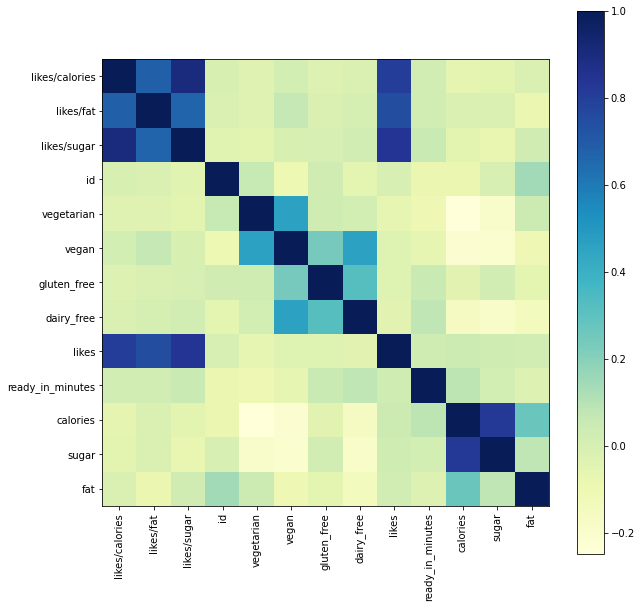

In [16]:
x = dfs_filtered.corr()

plt.figure(figsize=(10,10))
plt.imshow(x, cmap="YlGnBu")
plt.colorbar()


plt.xticks(range(len(x)),x.columns, rotation=90)

plt.yticks(range(len(x)),x.columns)
plt.show()

Aufgrund der Korrelationstabelle lässt sich ableiten, dass sich kein Zusammenhang zwischen Zutaten und Likes sowie der Zubereitungszeit und den Likes erkennen. Jedoch lässt sich ein Zusammenhang zwischen Zucker und Kalorien erkennen. Dieser ist sogar stärker als der zwischen Fett und Kalorien

### 6. Inhaltsstoffe und Kalorien

/home/jakob/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


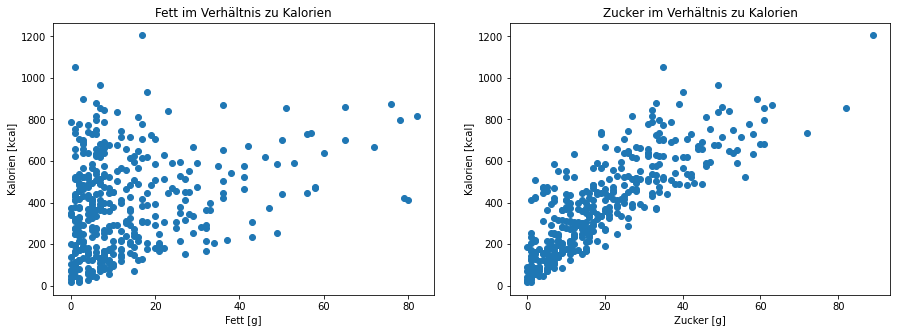

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

ax1.scatter(dfs_filtered["fat"], dfs_filtered["calories"])
ax1.set_xlabel("Fett [g]")
ax1.set_ylabel("Kalorien [kcal]")
ax1.set_title("Fett im Verhältnis zu Kalorien")

ax2.scatter(dfs_filtered["sugar"], dfs_filtered["calories"])
ax2.set_xlabel("Zucker [g]")
ax2.set_ylabel("Kalorien [kcal]")
ax2.set_title("Zucker im Verhältnis zu Kalorien")

fig.show()

# Wahrscheinlichkeit (laktosefrei und vegan)

In [18]:
p_dairy_free = dfs_wod["dairy_free"].sum()/dfs_wod["dairy_free"].count()
p_vegan = dfs_wod["vegan"].sum()/dfs_wod["vegan"].count()
p_vegan_and_dairy_free = dfs_wod[(dfs_wod["dairy_free"]==1) & (dfs_wod["vegan"]==1)]["vegan"].sum()/dfs_wod["dairy_free"].count()


In [19]:
p_a_b = p_vegan_and_dairy_free/p_dairy_free

p_b_a = p_vegan_and_dairy_free/p_vegan

In [20]:
print(f"P(Vegan|Laktosefrei) = {p_a_b} und P(Laktosefrei|Vegan) = {p_b_a}")

P(Vegan|Laktosefrei) = 0.34064594759293115 und P(Laktosefrei|Vegan) = 1.0
